# Harish Practise: K Means Clustering

Problem Statement: Use K Means for customer segmentation. We will cluster people based on their income.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


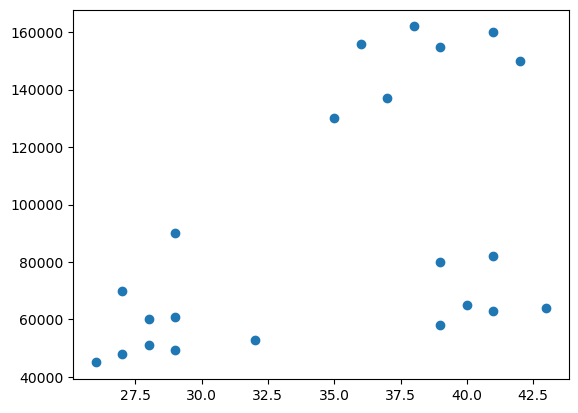

In [4]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

# K means Clustering

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init='auto')
km.fit(df[['Age','Income($)']])
km.labels_

C:\Users\91829\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [14]:
df['Cluster']=km.labels_
df.head()

,Name,Age,Income($),cluster,Cluster
0,Rob,27,70000,0,0
1,Michael,29,90000,0,0
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
4,Kory,42,150000,1,1


<Axes: xlabel='Age', ylabel='Income($)'>

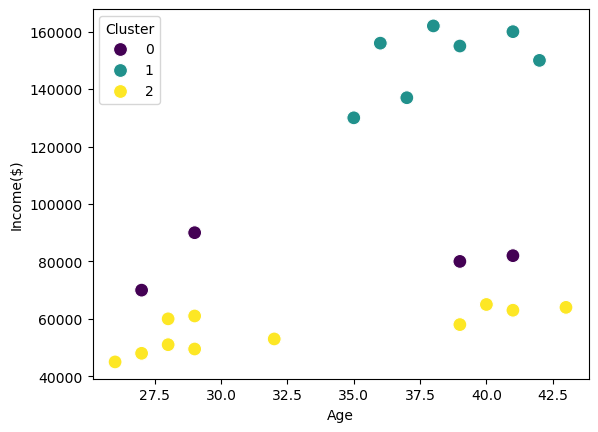

In [15]:
import seaborn as sns

sns.scatterplot(df, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")

# Min Max Scaling

Clusters are not formed properly. It can be due to Age and Income columns being on a different scale. We can try scaling them

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [20]:
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled[["Age", "Income($)"]])
df_scaled['Cluster'] = km.labels_
df_scaled.head()

C:\Users\91829\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


In [21]:
km.inertia_

0.4750783498553096

In [22]:
centroids = km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

<Axes: xlabel='Age', ylabel='Income($)'>

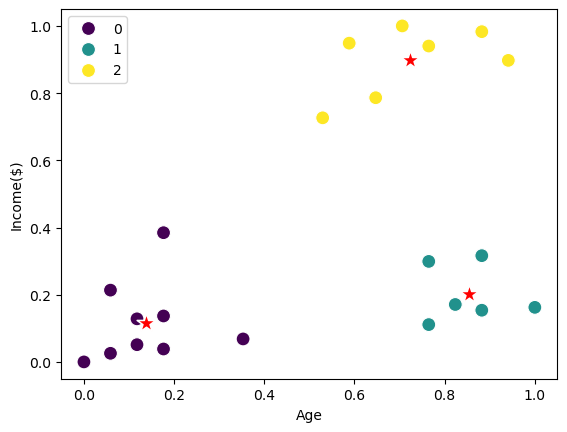

In [23]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],  s=200, color="red", marker='*')

### Elbow method to determine optimal number of clusters